In [1]:
#Import the Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
log = pd.read_csv(r'C:/Users/Rohan/Desktop/Twitter API 5.csv')

In [3]:
# Twitter API credentials
AccessToken = log['Key'][0]
AccessTokenSecret = log['Key'][1]
ConsumerKey = log['Key'][2]
ConsumerKeySecret = log['Key'][3]

In [4]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey,ConsumerKeySecret)


In [5]:
#Set the acess token and access token secret
authenticate.set_access_token(AccessToken, AccessTokenSecret)

In [6]:
# Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [7]:
#Wangchuk66

In [8]:
# Extract 100 Tweets from the twitter user
posts = api.user_timeline(screen_name = 'anandmahindra',count = 100 ,lang = 'en' ,tweet_mode ='extended')

Unexpected parameter: lang


In [9]:
# Print the last 10 tweets from the account
print ('show the 10 tweets: \n')
for tweet in posts[0:10]:
    print (tweet.full_text + '\n')

show the 10 tweets: 

RT @autocarpro: Maruti Suzuki maintains lead in Utility Vehicles over Hyundai Motor India; Mahindra &amp; Mahindra regains No. 3 spot. Despite…

RT @autocarpro: Pininfarina-designed VF e35 &amp; e36 to debut at 2021 LA Auto Show. The all-new tech-laden electric SUVs are the centrepiece o…

Received this post from a friend. Apparently an off-road rally in Kerala. Perfect analogy for how Monday morning feels.  But we’ll make it out of the early potholes! #MondayMotivation https://t.co/fynwLOhGIJ

RT @shuklasach: #ThingsThisWeek
Watch out for India’s Oct #WPI inflation, foreign trade data &amp; Covid trajectory. Also see US retail sales,…

Agree https://t.co/9KNRXolfeQ

Let’s scale it up @manoj_naandi It’s a national priority. @nstomar @byadavbjp @narendramodi https://t.co/s5wnwjJwFN

RT @aarjunx: @anandmahindra It's not the size of the dog in the fight, it's the size of the fight in the dog.

Two nations with microscopic populations compared to South Asian countries

In [10]:
# Print the last 10 tweets from the account
print ('show the 10 tweets: \n')
i=1
for tweet in posts[0:10]:
    print (str(i)+')'+ tweet.full_text + '\n')
    i = i + 1

show the 10 tweets: 

1)RT @autocarpro: Maruti Suzuki maintains lead in Utility Vehicles over Hyundai Motor India; Mahindra &amp; Mahindra regains No. 3 spot. Despite…

2)RT @autocarpro: Pininfarina-designed VF e35 &amp; e36 to debut at 2021 LA Auto Show. The all-new tech-laden electric SUVs are the centrepiece o…

3)Received this post from a friend. Apparently an off-road rally in Kerala. Perfect analogy for how Monday morning feels.  But we’ll make it out of the early potholes! #MondayMotivation https://t.co/fynwLOhGIJ

4)RT @shuklasach: #ThingsThisWeek
Watch out for India’s Oct #WPI inflation, foreign trade data &amp; Covid trajectory. Also see US retail sales,…

5)Agree https://t.co/9KNRXolfeQ

6)Let’s scale it up @manoj_naandi It’s a national priority. @nstomar @byadavbjp @narendramodi https://t.co/s5wnwjJwFN

7)RT @aarjunx: @anandmahindra It's not the size of the dog in the fight, it's the size of the fight in the dog.

8)Two nations with microscopic populations compared to South

In [11]:
# Create a dataframe with a column called twets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [12]:
df

,Tweets
0,RT @autocarpro: Maruti Suzuki maintains lead i...
1,RT @autocarpro: Pininfarina-designed VF e35 &a...
2,Received this post from a friend. Apparently a...
3,RT @shuklasach: #ThingsThisWeek\nWatch out for...
4,Agree https://t.co/9KNRXolfeQ
...,...
95,RT @shuklasach: #ThingsThisWeek\nHeavy data we...
96,Delighted that the progress meets your approva...
97,Bilkul. Bahut pain hua. Lekin kam se kam pain ...
98,To say that this was a ‘convincing victory’ fo...


In [13]:
df.loc[0].values[0]

'RT @autocarpro: Maruti Suzuki maintains lead in Utility Vehicles over Hyundai Motor India; Mahindra &amp; Mahindra regains No. 3 spot. Despite…'

In [14]:
df.loc[1].values[0]

'RT @autocarpro: Pininfarina-designed VF e35 &amp; e36 to debut at 2021 LA Auto Show. The all-new tech-laden electric SUVs are the centrepiece o…'

In [15]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the "#" symbol
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyper 
    #text = re.sub(r'https?:\/\/\S*','',text, flags=re.MULTILINE)
    
    
    return text

In [16]:
# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [17]:
#Show the cleaned text
df

,Tweets
0,: Maruti Suzuki maintains lead in Utility Vehi...
1,: Pininfarina-designed VF e35 &amp; e36 to deb...
2,Received this post from a friend. Apparently a...
3,: ThingsThisWeek\nWatch out for India’s Oct WP...
4,Agree
...,...
95,: ThingsThisWeek\nHeavy data week ahead: Watch...
96,Delighted that the progress meets your approva...
97,Bilkul. Bahut pain hua. Lekin kam se kam pain ...
98,To say that this was a ‘convincing victory’ fo...


In [18]:
df.loc[0].values[0]

': Maruti Suzuki maintains lead in Utility Vehicles over Hyundai Motor India; Mahindra &amp; Mahindra regains No. 3 spot. Despite…'

In [19]:
# Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

In [20]:
# Show the new Dataframe with the new columns
df

,Tweets,Subjectivity,polarity
0,: Maruti Suzuki maintains lead in Utility Vehi...,0.000000,0.000000
1,: Pininfarina-designed VF e35 &amp; e36 to deb...,0.000000,0.000000
2,Received this post from a friend. Apparently a...,0.550000,0.391667
3,: ThingsThisWeek\nWatch out for India’s Oct WP...,0.125000,-0.125000
4,Agree,0.000000,0.000000
...,...,...,...
95,: ThingsThisWeek\nHeavy data week ahead: Watch...,0.500000,-0.200000
96,Delighted that the progress meets your approva...,0.617857,0.492857
97,Bilkul. Bahut pain hua. Lekin kam se kam pain ...,0.000000,0.000000
98,To say that this was a ‘convincing victory’ fo...,0.550000,0.250000


In [21]:
# Visual word cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500,height=300,random_state=21,max_font_size=119).generate(allWords)

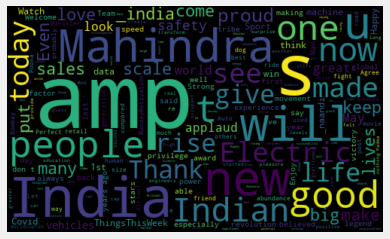

In [22]:
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute the negative , neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['polarity'].apply(getAnalysis)

In [24]:
# Show the dataframe

df

,Tweets,Subjectivity,polarity,Analysis
0,: Maruti Suzuki maintains lead in Utility Vehi...,0.000000,0.000000,Neutral
1,: Pininfarina-designed VF e35 &amp; e36 to deb...,0.000000,0.000000,Neutral
2,Received this post from a friend. Apparently a...,0.550000,0.391667,Positive
3,: ThingsThisWeek\nWatch out for India’s Oct WP...,0.125000,-0.125000,Negative
4,Agree,0.000000,0.000000,Neutral
...,...,...,...,...
95,: ThingsThisWeek\nHeavy data week ahead: Watch...,0.500000,-0.200000,Negative
96,Delighted that the progress meets your approva...,0.617857,0.492857,Positive
97,Bilkul. Bahut pain hua. Lekin kam se kam pain ...,0.000000,0.000000,Neutral
98,To say that this was a ‘convincing victory’ fo...,0.550000,0.250000,Positive


In [25]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['polarity'])
for i in range (0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j = j+1

1)Received this post from a friend. Apparently an off-road rally in Kerala. Perfect analogy for how Monday morning feels.  But we’ll make it out of the early potholes! MondayMotivation 

2)Delhi is struggling for breath. But solutions are in sight. _India -a venture by our Naandi Foundation has a ‘proof of concept.’  We—and many others—must scale this up rapidly… 

3)Today we observe the birth anniversary of India’s 1st Prime Minister. A historic figure &amp; yet many of my generation, remember him most fondly as ‘Chacha Nehru.’  His love for children was legendary. People are best remembered for their human qualities. Happy ChildrensDay2021 

4) Why do you think I put Bombay and Poona in inverted commas? Because in ‘72 that’s what they were still called. If I had used Mumbai and Pune someone would have pointed out that my narrative was inauthentic.  You can’t win on twitter! 😬

5)“Main akela hi chala tha janib-e-manzil magar log saath aate gaye aur karvan banta gaya…” 

6)Remembering 

In [26]:
# Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['polarity'],ascending='False')
for i in range (0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+ ') '+sortedDF['Tweets'][i])
        print()
        j = j+1


1) : ThingsThisWeek
Watch out for India’s Oct WPI inflation, foreign trade data &amp; Covid trajectory. Also see US retail sales,…

2) Two nations with microscopic populations compared to South Asian countries. Even compared to England. But they’re in the finals having outclassed all others. Sport is about the abundance of spirit as much as it is about the abundance of raw talent… 

3) And here’s our ‘CODE’ for the next Green Revolution…  A machine like no other; one that will democratise farm mechanisation. Well done Team  ! 

4) This video is from a couple of years ago, but I don’t think it will ever be ‘dated.’ I like to put it on every now &amp; then, especially when some personal or business goal is looking intimidating or impossible! All my fears vanish instantly… 

5) :  2 factors.
Revenge buying
Increased price per unit
In my view it's  short-lived phenomenon. A long lull…

6) :  Last year was tough for everyone due to covid intensity and also because people realised that futur

<function matplotlib.pyplot.show(close=None, block=None)>

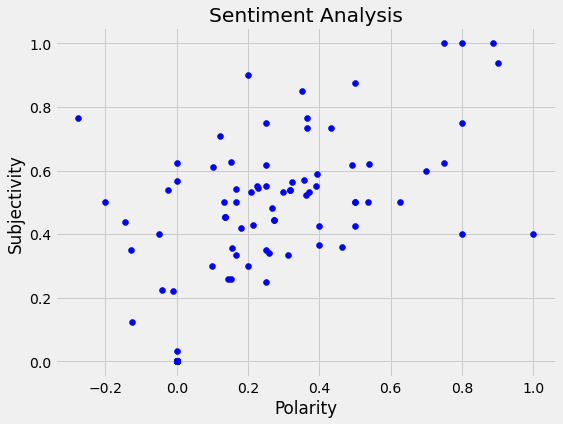

In [27]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [28]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

64.0

In [29]:
# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

9.0

In [30]:
# shaow the values counts

df['Analysis'].value_counts()

Positive    64
Neutral     27
Negative     9
Name: Analysis, dtype: int64

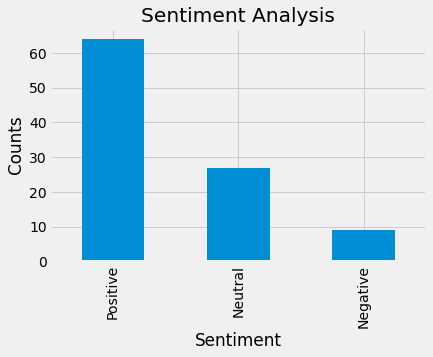

In [31]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()